<a href="https://colab.research.google.com/github/pedrocacioli/Exerc-cios/blob/main/Regressao_Linear_Machine_Learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel('Fonte dos Dados (1).xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


<ipython-input-2-cd911b44f51a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


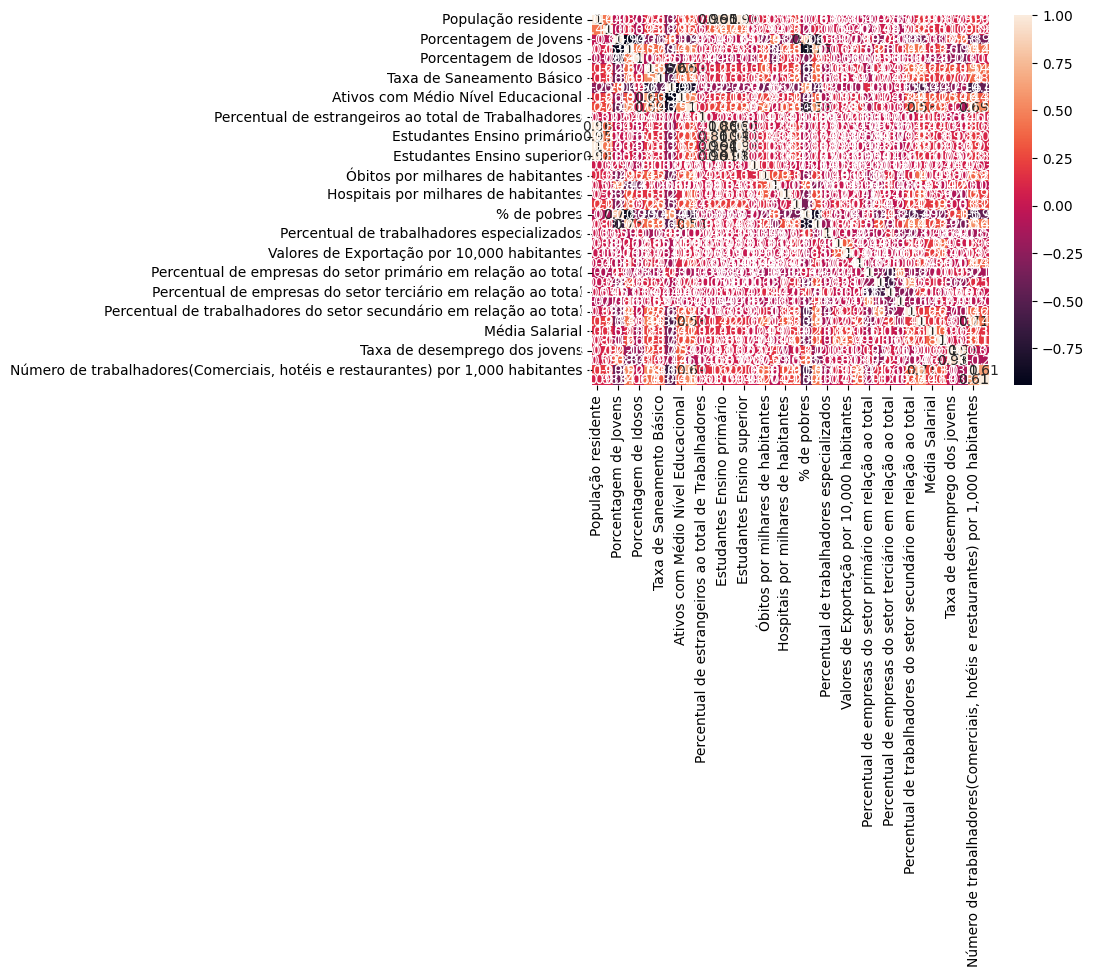

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

In [ ]:
df.corr()['População residente'].sort_values()

<ipython-input-3-965642b79ad3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['População residente'].sort_values()


Ativos com Baixo Nível Educacional                                                -0.245494
Percentual de trabalhadores do setor primário em relação ao total                 -0.077270
% de pobres                                                                       -0.075559
Porcentagem de Idosos                                                             -0.072246
Percentual de empresas do setor primário em relação ao total                      -0.071642
Porcentagem de Jovens                                                             -0.030194
Percentual de empresas do setor secundário em relação ao total                     0.003273
Número de hotéis por 10,000 habitantes                                             0.004052
Valores de Exportação por 10,000 habitantes                                        0.014814
Óbitos até 1 ano de idade por milhares de habitantes                               0.029893
Percentual de estrangeiros ao total de Trabalhadores                            

In [ ]:
correlacao = df.corr()
correlacao_filtrada = correlacao['População residente'][correlacao['População residente']>0.3]
correlacao_filtrada

<ipython-input-4-57446f5a5e91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


População residente             1.000000
Densidade demográfica           0.440335
PIB Municipal                   0.960083
Estudantes Ensino primário      0.946782
Estudantes Ensino secundário    0.996182
Estudantes Ensino superior      0.979128
Name: População residente, dtype: float64

In [ ]:
df=df[correlacao_filtrada.index]

In [ ]:
x=df.drop('População residente', axis=1)
y=df['População residente']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_train, y_train)
predicao_modelo=modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

4840.931485745449

In [ ]:
y_test

626      16359
4743    118843
3047      6761
3199     20253
4037     22814
         ...  
650      60158
4457      4468
708      37471
3332     35274
5022      2714
Name: População residente, Length: 1670, dtype: int64

In [ ]:
predicao_modelo

array([ 11818.55757563, 108079.49879558,   6727.30448883, ...,
        45960.26037363,  30385.49104215,   4069.50936272])

In [ ]:
from sklearn.linear_model import Ridge
modelo = Ridge()
modelo.fit(x_train, y_train)
predicao_modelo=modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

4840.931485634248

In [ ]:
from sklearn.linear_model import Lasso
modelo = Lasso()
modelo.fit(x_train, y_train)
predicao_modelo=modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

4840.931293773446

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelo = XGBRegressor()

In [ ]:
modelo.fit(x_train, y_train)
predicao_modelo=modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

12959.135203762396

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(predicao_modelo, y_test)
print(f'O erro absoluto médio do modelo é {MAE}')

O erro absoluto médio do modelo é 12959.135203762396


In [ ]:
import numpy as np
MSE = mean_squared_error(predicao_modelo, y_test)
print(f'O erro quadrado médio é {MSE}')
print(f'a raíz quadrada do erro quadrado médio é {np.sqrt(MSE)}')

O erro quadrado médio é 58183608686.15104
a raíz quadrada do erro quadrado médio é 241212.78715306747


In [ ]:
R_2 = r2_score(predicao_modelo, y_test)
print(f'O R2 do modelo é {np.sqrt(R_2)}')

O R2 do modelo é nan


<ipython-input-23-596efe9f7ad1>:2: RuntimeWarning: invalid value encountered in sqrt
  print(f'O R2 do modelo é {np.sqrt(R_2)}')
